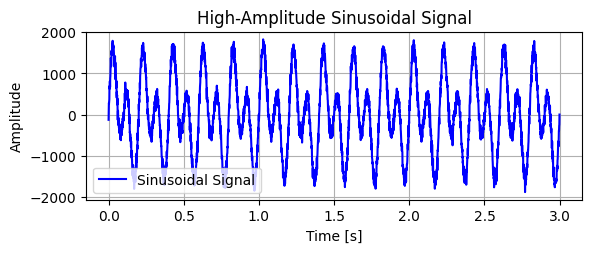

In [1]:
#Create one artificial time series composed of repeating signal (like sum of sinus signals) with noise
from numpy import *
import matplotlib.pyplot as plt

dt=1/1000
Tstop=3  # [sec]
f1=10
f2=5
t=arange(0,Tstop,dt)
A1=1000
A2=800
# Creating a sine wave by adding 2 sine waves at different frequencies
wave1=A1*sin(2*pi*f1*t)
wave2=A2*sin(2*pi*f2*t)
y=wave1+wave2
# Adding Gaussian Noise to the signal
noise = 100.0 * random.normal(size=t.shape)
noisy_signal = y + noise

# Plotting the signal
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, label='Sinusoidal Signal', color='b')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-Amplitude Sinusoidal Signal')
plt.grid(True)
plt.legend()
plt.show()

ADF statistics:  -7.278078464184667
p-value: 1.5257297519011895e-10
Critical Values:  {'1%': -3.4325536905242227, '5%': -2.862513646507894, '10%': -2.567288298246211}


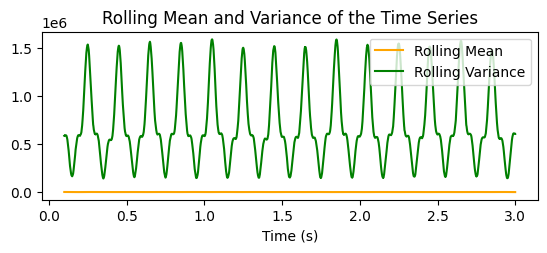

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
# Analysing the data to check if it fits the stationary data assumption

#converting to df
signal_df=pd.DataFrame(noisy_signal,columns=['Noisy_Signal'])

# Perform ADF test
result = adfuller(signal_df['Noisy_Signal'])

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF statistics: ',adf_statistic)
print(f'p-value: {p_value}')
print('Critical Values: ',critical_values)

# Calculating rolling mean and variance
window_size=100
rolling_mean=signal_df['Noisy_Signal'].rolling(window=window_size).mean()
rolling_var=signal_df['Noisy_Signal'].rolling(window=window_size).var()

plt.subplot(2, 1, 2)
plt.plot(t, rolling_mean, color='orange', label='Rolling Mean')
plt.plot(t, rolling_var, color='green', label='Rolling Variance')
plt.title("Rolling Mean and Variance of the Time Series")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

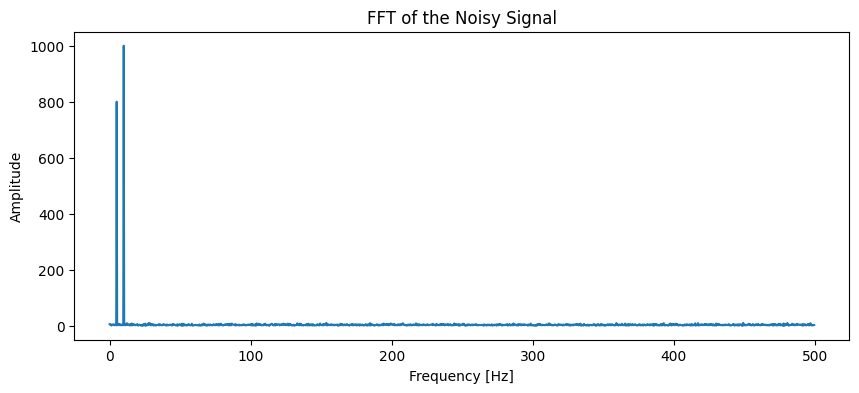

<Figure size 1000x400 with 0 Axes>

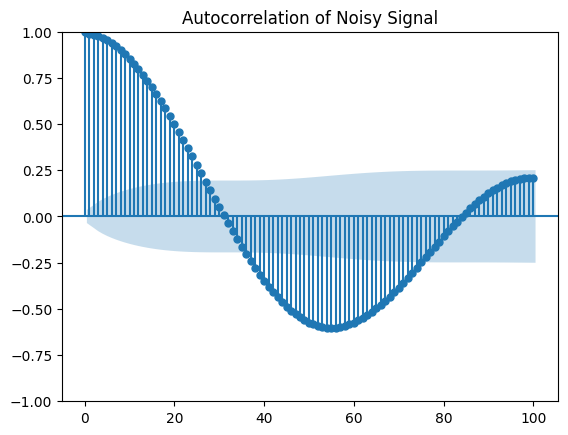

In [ ]:
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf

# 2. Analyze the repeating patterns using FFT (frequency domain)

# Perform FFT on the noisy signal
N = len(noisy_signal)
yf = fft(noisy_signal)        # Compute the FFT
xf = fftfreq(N, dt)[:N//2]       # Frequency bins

# Plot the FFT result (Frequency domain)
plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0/N * abs(yf[:N//2]))  # Plot the magnitude of the FFT
plt.title("FFT of the Noisy Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

# 3. Analyze the repeating patterns using Autocorrelation (time domain)

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(10, 4))
plot_acf(noisy_signal, lags=100, alpha=0.05)
plt.title("Autocorrelation of Noisy Signal")
plt.show()